<a href="https://colab.research.google.com/github/M4T30-772/Implementacija-modela-za-klasifikaciju-vrste-instrumenta-kori-tenjem-konvolucijskih-neuronskih-mre-a/blob/main/Finalni_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Instrument/Train'
valid_path = '/content/drive/MyDrive/Instrument/Test'
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
for layer in inception.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/Instrument/Train/*')
folders

['/content/drive/MyDrive/Instrument/Train/Banjo_train',
 '/content/drive/MyDrive/Instrument/Train/Bubnjevi_train',
 '/content/drive/MyDrive/Instrument/Train/Gitara_train',
 '/content/drive/MyDrive/Instrument/Train/Saksofon_train',
 '/content/drive/MyDrive/Instrument/Train/Klavir_train',
 '/content/drive/MyDrive/Instrument/Train/Truba_train',
 '/content/drive/MyDrive/Instrument/Train/Flauta_train',
 '/content/drive/MyDrive/Instrument/Train/Violina_train',
 '/content/drive/MyDrive/Instrument/Train/Harmonika_train',
 '/content/drive/MyDrive/Instrument/Train/Harfa_train']

In [ ]:
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Instrument/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 3539 images belonging to 10 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Instrument/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 996 images belonging to 10 classes.


In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-18-5932e3024fde>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


111/111 [==============================] - 1252s 11s/step - loss: 2.7218 - accuracy: 0.8047 - val_loss: 0.7084 - val_accuracy: 0.9408
Epoch 2/10
111/111 [==============================] - 642s 6s/step - loss: 1.1532 - accuracy: 0.8997 - val_loss: 0.6763 - val_accuracy: 0.9398
Epoch 3/10
111/111 [==============================] - 637s 6s/step - loss: 0.8904 - accuracy: 0.9263 - val_loss: 0.6983 - val_accuracy: 0.9367
Epoch 4/10
111/111 [==============================] - 648s 6s/step - loss: 0.7133 - accuracy: 0.9429 - val_loss: 0.6937 - val_accuracy: 0.9498
Epoch 5/10
111/111 [==============================] - 639s 6s/step - loss: 0.7456 - accuracy: 0.9395 - val_loss: 0.6735 - val_accuracy: 0.9588
Epoch 6/10
111/111 [==============================] - 647s 6s/step - loss: 0.5694 - accuracy: 0.9531 - val_loss: 0.8047 - val_accuracy: 0.9468
Epoch 7/10
111/111 [==============================] - 642s 6s/step - loss: 0.5842 - accuracy: 0.9579 - val_loss: 1.1315 - val_accuracy: 0.9478
Epoch 8/

In [ ]:
import matplotlib.pyplot as plt

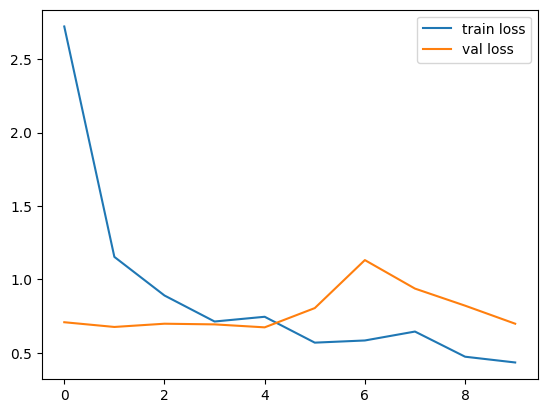

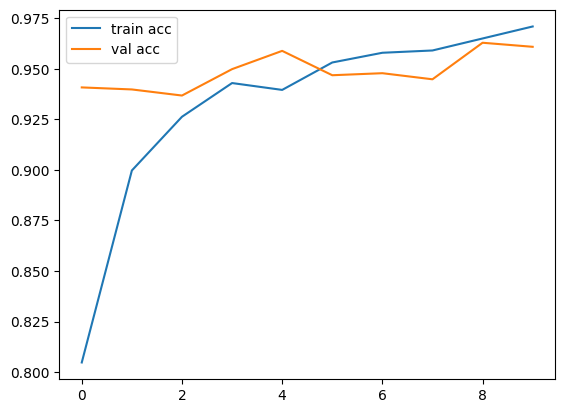

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
accuracy = r.history['accuracy'][-1]  # Uzimanje zadnjeg trenutka točnosti iz povijesti treninga
print(f'Točnost modela: {accuracy}')


Točnost modela: 0.9708957076072693


In [ ]:
loss = r.history['loss'][-1]  # Uzimanje zadnjeg trenutka gubitka iz povijesti treninga
print(f'Gubitak modela: {loss}')


Gubitak modela: 0.4344135522842407


In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(test_set)
y_pred = np.argmax(y_pred, axis=1)  # Pretvaranje vjerojatnosti u klase
y_true = test_set.classes

cm = confusion_matrix(y_true, y_pred)
print('Matrica zabune:')
print(cm)


 5/32 [===>..........................] - ETA: 1:53

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


32/32 [==============================] - 142s 4s/step
Matrica zabune:
[[ 9 12  7  9 10  8 12 12 12  9]
 [10  6 10 13 11 10 10 13  6 10]
 [ 9 17 10 13 10  5 12 11 10  3]
 [ 4 15  9  9  7 14  9 11 10 12]
 [ 9 15  6 13 13  7  7 12  6 12]
 [ 9 12 12 11 12  7 10  7 12  6]
 [14 12  9  9 11 10  7 11  7  9]
 [12  5 11 13 11  8 11  9 13  7]
 [ 7  5  6 10  8 15 12 12 10 15]
 [12 11 12 10  7 14  5  8 10 11]]
